In [13]:
#get the fruits data extract from https://www.kaggle.com/moltean/fruits/version/22

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/Fruit-Images-Dataset-master/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
import os
import random
from PIL import *
from PIL import ImageEnhance
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy



In [15]:
train_path = "C:\\Users\gorti\Desktop\\project\\Fruit-Images-Dataset-master\\Training\\"
test_path = "C:\\Users\gorti\Desktop\\project\\Fruit-Images-Dataset-master\\Test\\"

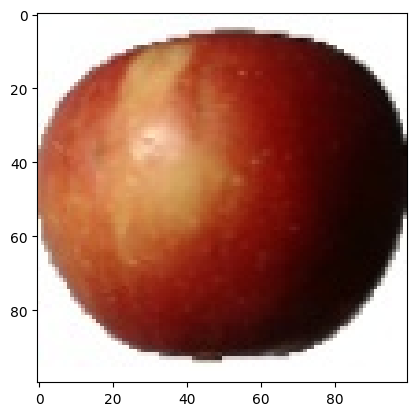

In [16]:
file_path = train_path + "Apple Braeburn\\0_100.jpg"
if os.path.exists(file_path):
    img = load_img(file_path)
    plt.imshow(img)
    plt.axis("on")
    plt.show()
else:
    print("File not found at:", file_path)

In [17]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [12]:
# Define the directory paths for the original and augmented images
original_dir = "C:\\Users\gorti\Desktop\\project\\Fruit-Images-Dataset-master\\Training\\"
augmented_dir = 'C:\\Users\gorti\Desktop\\project\\Fruit-Images-Dataset-master\\Augmented\\'

In [13]:
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

PermissionError: [WinError 5] Access is denied: 'C:\\Users\\karth'

In [ ]:
# Define the data augmentation parameters
rotation_range = (-1, 1)
width_shift_range = (-0.01, 0.01)
height_shift_range = (-0.01, 0.01)
shear_range = (-10, 10)
zoom_range = (0.5, 0.7)
horizontal_flip = False
vertical_flip = False


In [ ]:
# Define the functions for each data augmentation technique
def rotate_image(img, rotation_range):
    angle = random.uniform(rotation_range[0], rotation_range[1])
    return img.rotate(angle)


In [ ]:
def shift_image(img, width_shift_range, height_shift_range):
    width_shift = random.uniform(width_shift_range[0], width_shift_range[1]) * img.size[0]
    height_shift = random.uniform(height_shift_range[0], height_shift_range[1]) * img.size[1]
    return img.transform(img.size, Image.AFFINE, (1, 0, width_shift, 0, 1, height_shift))

In [ ]:
def shear_image(img, shear_range):
    shear = random.uniform(shear_range[0], shear_range[1])
    return img.transform(img.size, Image.AFFINE, (1, shear, 0, 0, 1, 0))

In [ ]:
def zoom_image(img, zoom_range):
    zoom = random.uniform(zoom_range[0], zoom_range[1])
    new_size = tuple(int(dim * zoom) for dim in img.size)
    return img.resize(new_size, Image.BICUBIC)

In [ ]:
def flip_image(img, horizontal_flip, vertical_flip):
    if horizontal_flip and vertical_flip:
        return img.transpose(Image.FLIP_BOTH)
    elif horizontal_flip:
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    elif vertical_flip:
        return img.transpose(Image.FLIP_TOP_BOTTOM)
    else:
        return img

In [ ]:
def apply_random_brightness(img, brightness_range=(0.5, 1.5)):
    brightness = random.uniform(brightness_range[0], brightness_range[1])
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(brightness)

In [ ]:
num_augmented_per_image = 3

In [ ]:
# Define a function to apply data augmentation to images in a directory
def apply_data_augmentation(original_dir, augmented_dir, num_augmented_per_image=3):
    augmented_images = []
    labels = []
    
    for subdir in os.listdir(original_dir):
        if not os.path.isdir(os.path.join(original_dir, subdir)):
            continue  # Skip non-directory files
        
        for file in os.listdir(os.path.join(original_dir, subdir)):
            if not file.endswith('.jpg'):
                continue  # Skip non-JPEG files
            
            img_path = os.path.join(original_dir, subdir, file)
            img = Image.open(img_path)

            # Apply the data augmentation transformations
            img = rotate_image(img, rotation_range)
            img = shift_image(img, width_shift_range, height_shift_range)
            img = shear_image(img, shear_range)
            img = zoom_image(img, zoom_range)
            img = flip_image(img, horizontal_flip, vertical_flip)

            # Save the augmented images to the augmented directory
            img_name, img_ext = os.path.splitext(file)
            for i in range(num_augmented_per_image):
                augmented_img_name = f"{img_name}_aug{i+1}"
                augmented_dir_class = os.path.join(augmented_dir, subdir)
                os.makedirs(augmented_dir_class, exist_ok=True)
                augmented_img_path = os.path.join(augmented_dir_class, f"{augmented_img_name}{img_ext}")
                augmented_img = img.copy()
                augmented_img = apply_random_brightness(augmented_img)
                augmented_img.save(augmented_img_path)
                augmented_images.append(augmented_img_path)
                labels.append(subdir)
    
    return augmented_images, labels



augmented_images, labels = apply_data_augmentation(original_dir, augmented_dir, num_augmented_per_image)

In [ ]:
import shutil
from PIL import Image
# Define the path for the new training directory
new_train_dir = "C:\\Users\gorti\Desktop\\project\\Fruit-Images-Dataset-master\\NewTraining\\"

# Create the new training directory if it does not exist
if not os.path.exists(new_train_dir):
    os.makedirs(new_train_dir)

# Loop through the subfolders in the original directory
for subdir in os.listdir(original_dir):
    if not os.path.isdir(os.path.join(original_dir, subdir)):
        continue  # Skip non-directory files
    
    # Create a subfolder in the new training directory with the same name as the original directory subfolder
    subdir_path = os.path.join(new_train_dir, subdir)
    os.makedirs(subdir_path)
    
    # Copy the images from the original directory subfolder to the new training directory subfolder
    for file in os.listdir(os.path.join(original_dir, subdir)):
        if not file.endswith('.jpg'):
            continue  # Skip non-JPEG files
        shutil.copy(os.path.join(original_dir, subdir, file), os.path.join(subdir_path, file))

# Loop through the subfolders in the augmented directory
for subdir in os.listdir(augmented_dir):
    if not os.path.isdir(os.path.join(augmented_dir, subdir)):
        continue  # Skip non-directory files
    
    # If the subfolder exists in the new training directory, copy the augmented images to it
    if os.path.exists(os.path.join(new_train_dir, subdir)):
        for file in os.listdir(os.path.join(augmented_dir, subdir)):
            if not file.endswith('.jpg'):
                continue  # Skip non-JPEG files
            img = Image.open(os.path.join(augmented_dir, subdir, file))
            img = img.resize((100, 100))  # Resize the image
            img.save(os.path.join(new_train_dir, subdir, file))  # Save the resized image to the new training directory
    # If the subfolder does not exist in the new training directory, create it and copy the augmented images to it
    else:
        subdir_path = os.path.join(new_train_dir, subdir)
        os.makedirs(subdir_path)
        for file in os.listdir(os.path.join(augmented_dir, subdir)):
            if not file.endswith('.jpg'):
                continue  # Skip non-JPEG files
            img = Image.open(os.path.join(augmented_dir, subdir, file))
            img = img.resize((100, 100))  # Resize the image
            img.save(os.path.join(subdir_path, file))  # Save the resized image to the new training directory


In [ ]:
file_path = new_train_dir + "Apple Crimson Snow\\14_100_aug2.jpg"
if os.path.exists(file_path):
    img = load_img(file_path)
    plt.imshow(img)
    plt.axis("on")
    plt.show()
else:
    print("File not found at:", file_path)

In [ ]:
img = img_to_array(img)
img.shape

In [37]:
new_train_dir = "C:\\Users\\gorti\\Desktop\\project\\Fruit-Images-Dataset-master\\Training\\"
test_dir = "C:\\Users\\gorti\\Desktop\\project\\Fruit-Images-Dataset-master\\Test\\"
input_shape=(100,100,3)
img_width, img_height = 100, 100
train_batch_size = 50
test_batch_size = 50
num_classes = 131


In [38]:
from keras import backend as K
K.set_epsilon(1e-07)
def custom_loss(y_true, y_pred):
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)
    return loss

In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

In [40]:
train_generator = train_datagen.flow_from_directory(new_train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size = train_batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.


In [41]:
# Create the data generator for the testing data

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size = test_batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 22688 images belonging to 131 classes.


In [42]:
if train_generator.batch_size != test_generator.batch_size:
    print("Error: batch size for training and testing data generators is different.")

# check if the number of classes used in training and testing is the same
num_classes_train = len(train_generator.class_indices)
num_classes_test = len(test_generator.class_indices)
print("num_classes_train:",num_classes_train)
print("num_classes_test:",num_classes_test)
if num_classes_train != num_classes_test:
    print("Error: number of classes used in training and testing is different.")

num_classes_train: 131
num_classes_test: 131


In [43]:
# Load the EfficientNetB0 model and add layers to it
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=input_shape)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 100, 100, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 100, 100, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 25, 25, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 25, 25, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 25, 25, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 25, 25, 144)  1296       ['block2b_expand_activation[0][0]
 D)       

 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 13, 13, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 13, 13, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 13, 13, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
          

                                                                                                  
 block4b_activation (Activation  (None, 7, 7, 480)   0           ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 7, 7, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
          

                                                                                                  
 block5c_project_conv (Conv2D)  (None, 7, 7, 112)    75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 7, 7, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 7, 7, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 7, 7, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
          

                                                                                                  
 block6b_add (Add)              (None, 4, 4, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 4, 4, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 4, 4, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 4, 4, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 4, 4, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 4, 4, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 4, 4, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_b

In [44]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001), loss=custom_loss", metrics=['accuracy'])  
#model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
from keras.callbacks import EarlyStopping
# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [45]:
input_shape = model.input_shape[1:]
print("Expected input shape:", input_shape)

# Check input shape of test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=test_batch_size == 32,
    class_mode='categorical',
    shuffle=False)
test_data_shape = next(test_data)[0].shape[1:]
print("Input shape of test data:", test_data_shape)

if input_shape != test_data_shape:
    print("Error: Input shape of test data does not match expected input shape of the model.")


Expected input shape: (100, 100, 3)
Found 22688 images belonging to 131 classes.
Input shape of test data: (100, 100, 3)


In [46]:
hist = model.fit(train_generator, 
                 steps_per_epoch=500,
                 epochs=50,
                 validation_data=test_generator,
                 validation_steps=454)

Epoch 1/50
500/500 [==============================] - 165s 322ms/step - loss: 4.8725 - accuracy: 0.0140 - val_loss: 4.8666 - val_accuracy: 0.0145
Epoch 2/50
500/500 [==============================] - 162s 323ms/step - loss: 4.8632 - accuracy: 0.0150 - val_loss: 4.8616 - val_accuracy: 0.0145
Epoch 3/50
500/500 [==============================] - 166s 331ms/step - loss: 4.8610 - accuracy: 0.0145 - val_loss: 4.8592 - val_accuracy: 0.0145
Epoch 4/50
500/500 [==============================] - 163s 325ms/step - loss: 4.8580 - accuracy: 0.0142 - val_loss: 4.8577 - val_accuracy: 0.0145
Epoch 5/50
500/500 [==============================] - 162s 324ms/step - loss: 4.8558 - accuracy: 0.0157 - val_loss: 4.8569 - val_accuracy: 0.0145
Epoch 6/50
500/500 [==============================] - 155s 311ms/step - loss: 4.8573 - accuracy: 0.0141 - val_loss: 4.8567 - val_accuracy: 0.0145
Epoch 7/50
500/500 [==============================] - 158s 317ms/step - loss: 4.8569 - accuracy: 0.0146 - val_loss: 4.8566 -

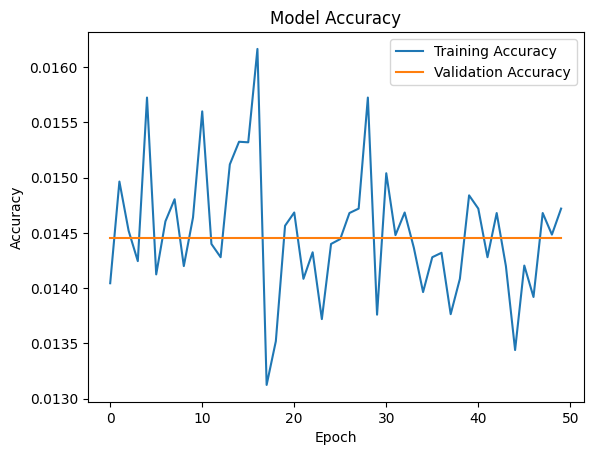

In [47]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

454/454 [==============================] - 75s 164ms/step - loss: 4.8565 - accuracy: 0.0145
Test accuracy: 0.014456981793045998
